In [34]:
import numpy as np 
from datetime import date
from datetime import timedelta
import datetime
from netCDF4 import Dataset
from sklearn import datasets
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

base_dir = ''
pmfile     = base_dir+'2019_4_month.nc' #monthly PM data
ice_sheets = Dataset(pmfile, mode='r').variables['sd'][70:,-120:]


latpm    = Dataset(pmfile, mode='r').variables['latitude'][-120:]
lonpm_rt = Dataset(pmfile, mode='r').variables['longitude'][:]


lonpm_rt = (lonpm_rt+ 180) % 360 - 180
print(ice_sheets.shape)

split_idx = np.argmax(lonpm_rt< 0)
ice = np.roll(ice_sheets, -split_idx, axis=2)
lonpm = np.roll(lonpm_rt, -split_idx)




print(latpm)



print(lonpm)


(52, 120, 1440)
[-60.25 -60.5  -60.75 -61.   -61.25 -61.5  -61.75 -62.   -62.25 -62.5
 -62.75 -63.   -63.25 -63.5  -63.75 -64.   -64.25 -64.5  -64.75 -65.
 -65.25 -65.5  -65.75 -66.   -66.25 -66.5  -66.75 -67.   -67.25 -67.5
 -67.75 -68.   -68.25 -68.5  -68.75 -69.   -69.25 -69.5  -69.75 -70.
 -70.25 -70.5  -70.75 -71.   -71.25 -71.5  -71.75 -72.   -72.25 -72.5
 -72.75 -73.   -73.25 -73.5  -73.75 -74.   -74.25 -74.5  -74.75 -75.
 -75.25 -75.5  -75.75 -76.   -76.25 -76.5  -76.75 -77.   -77.25 -77.5
 -77.75 -78.   -78.25 -78.5  -78.75 -79.   -79.25 -79.5  -79.75 -80.
 -80.25 -80.5  -80.75 -81.   -81.25 -81.5  -81.75 -82.   -82.25 -82.5
 -82.75 -83.   -83.25 -83.5  -83.75 -84.   -84.25 -84.5  -84.75 -85.
 -85.25 -85.5  -85.75 -86.   -86.25 -86.5  -86.75 -87.   -87.25 -87.5
 -87.75 -88.   -88.25 -88.5  -88.75 -89.   -89.25 -89.5  -89.75 -90.  ]
[-180.   -179.75 -179.5  ...  179.25  179.5   179.75]


[-60.25 -60.5  -60.75 -61.   -61.25 -61.5  -61.75 -62.   -62.25 -62.5
 -62.75 -63.   -63.25 -63.5  -63.75 -64.   -64.25 -64.5  -64.75 -65.
 -65.25 -65.5  -65.75 -66.   -66.25 -66.5  -66.75 -67.   -67.25 -67.5
 -67.75 -68.   -68.25 -68.5  -68.75 -69.   -69.25 -69.5  -69.75 -70.
 -70.25 -70.5  -70.75 -71.   -71.25 -71.5  -71.75 -72.   -72.25 -72.5
 -72.75 -73.   -73.25 -73.5  -73.75 -74.   -74.25 -74.5  -74.75 -75.
 -75.25 -75.5  -75.75 -76.   -76.25 -76.5  -76.75 -77.   -77.25 -77.5
 -77.75 -78.   -78.25 -78.5  -78.75 -79.   -79.25 -79.5  -79.75 -80.
 -80.25 -80.5  -80.75 -81.   -81.25 -81.5  -81.75 -82.   -82.25 -82.5
 -82.75 -83.   -83.25 -83.5  -83.75 -84.   -84.25 -84.5  -84.75 -85.
 -85.25 -85.5  -85.75 -86.   -86.25 -86.5  -86.75 -87.   -87.25 -87.5
 -87.75 -88.   -88.25 -88.5  -88.75 -89.   -89.25 -89.5  -89.75 -90.  ]
[-130.   -129.75 -129.5  -129.25 -129.   -128.75 -128.5  -128.25 -128.
 -127.75 -127.5  -127.25 -127.   -126.75 -126.5  -126.25 -126.   -125.75
 -125.5  -125.25 -1

(array([-140., -120., -100.,  -80.,  -60.,  -40.,  -20.]),
 [Text(-140.0, 0, '140°W'),
  Text(-120.0, 0, '120°W'),
  Text(-100.0, 0, '100°W'),
  Text(-80.0, 0, '80°W'),
  Text(-60.0, 0, '60°W'),
  Text(-40.0, 0, '40°W'),
  Text(-20.0, 0, '20°W')])

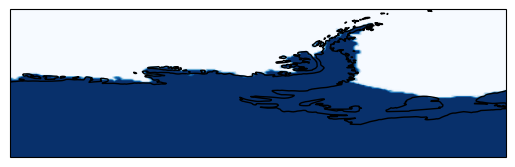

In [35]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#from cartopy.mpl.geoaxes import GeoAxes
from netCDF4 import Dataset
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  

import matplotlib.pyplot as plt


min_lat,max_lat = 0,120
min_lon,max_lon = 200,600

lat=latpm[min_lat:max_lat]
lon=lonpm[min_lon:max_lon]

print(lat)
print(lon)
trend1=ice[0,min_lat:max_lat,min_lon:max_lon]
#fig = plt.figure(figsize = (10,100))
#plt.subplot(1,1,1)

projection = ccrs.PlateCarree(central_longitude=0.0)
ax = plt.axes(projection = projection)
#ax.set_xticks(np.linspace(-180,180,5) , crs=projection)
#ax.set_yticks(np.linspace(-90,90,5), crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
img=plt.contourf(lon,lat,
              np.clip(trend1,a_min =0,a_max = 10),vmin=0, vmax=10,
              transform=ccrs.PlateCarree(),levels=90,
              cmap = 'Blues',
            )
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
#ax.gridlines()
plt.ylabel('Latitude',fontsize = 27)
plt.xlabel('Longitude',fontsize = 27)
plt.yticks(fontsize = 21)
plt.xticks(fontsize = 21)


#plt.title('Trend in LWup_Clear Sky_Sfc_Jan(2000-2022)',fontsize = 21)

 

In [36]:
import pickle
import collections

import os
import glob
import pickle

# Define the folder

import os
import glob
import pickle

def extract_node_edge_info_from_pickles(folder_path):
    """
    Reads all .pkl files from the specified folder and returns aggregated
    node and edge repetition counts across graphs.

    Parameters:
        folder_path (str): Path to the folder containing .pkl files

    Returns:
        node_info_dict (dict): Node-level count and position data
        edge_info_dict (dict): Edge-level count and position data
    """
    pickle_files = sorted(glob.glob(os.path.join(folder_path, "*.pkl")))

    node_info_dict = {}
    edge_info_dict = {}

    for filename in pickle_files:
        with open(filename, 'rb') as f:
            data = pickle.load(f)
            G = data['graph']
            pos = data['pos']

            for node in G.nodes():
                if node not in node_info_dict:
                    node_info_dict[node] = {
                        'count': 1,
                        'pos': pos[node]
                    }
                else:
                    node_info_dict[node]['count'] += 1

            for u, v in G.edges():
                edge = (u, v)
                if edge not in edge_info_dict:
                    edge_info_dict[edge] = {
                        'count': 1,
                        'pos_u': pos[u],
                        'pos_v': pos[v]
                    }
                else:
                    edge_info_dict[edge]['count'] += 1

    return node_info_dict, edge_info_dict



r1-r1
(120, 400)
r1-r2
(120, 400)
r1-r3
(120, 400)
r2-r1
(120, 400)
r2-r2
(120, 400)
r2-r3
(120, 400)
r3-r1
(120, 400)
r3-r2
(120, 400)
r3-r3
(120, 400)


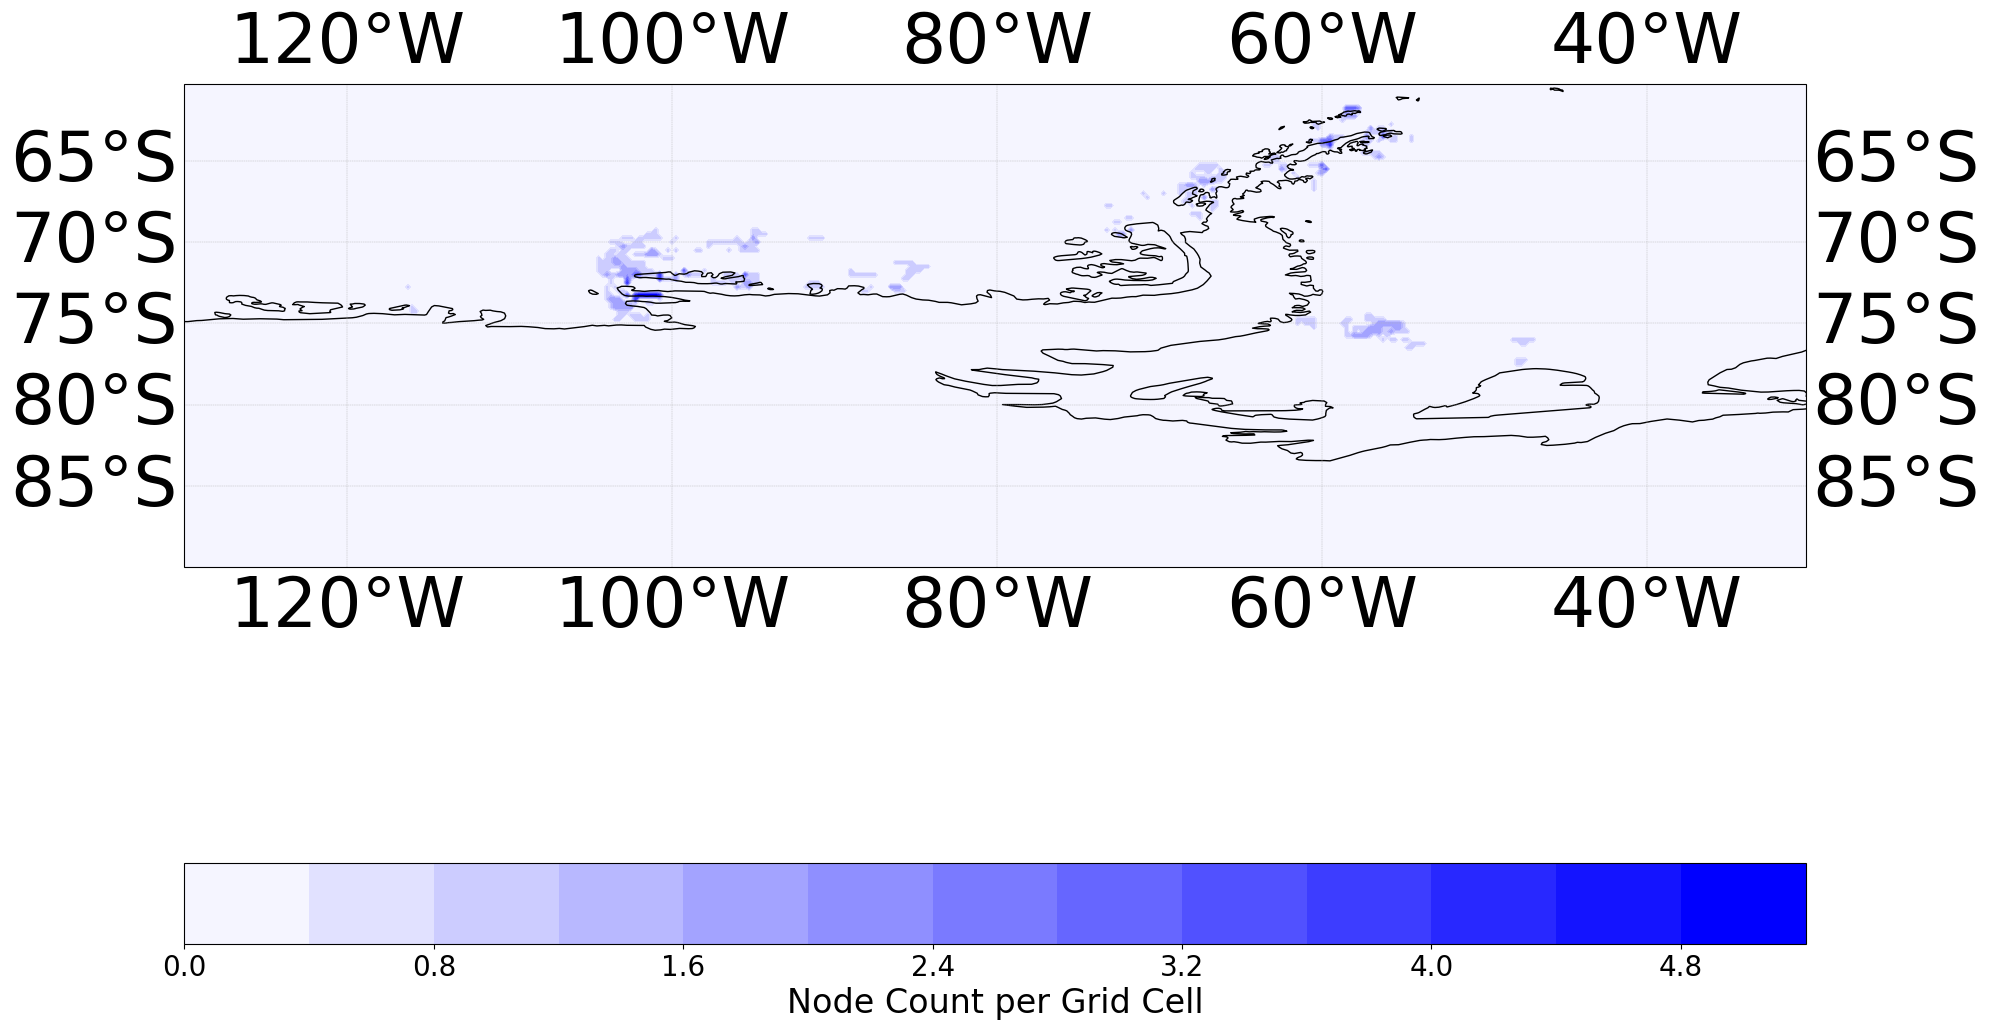

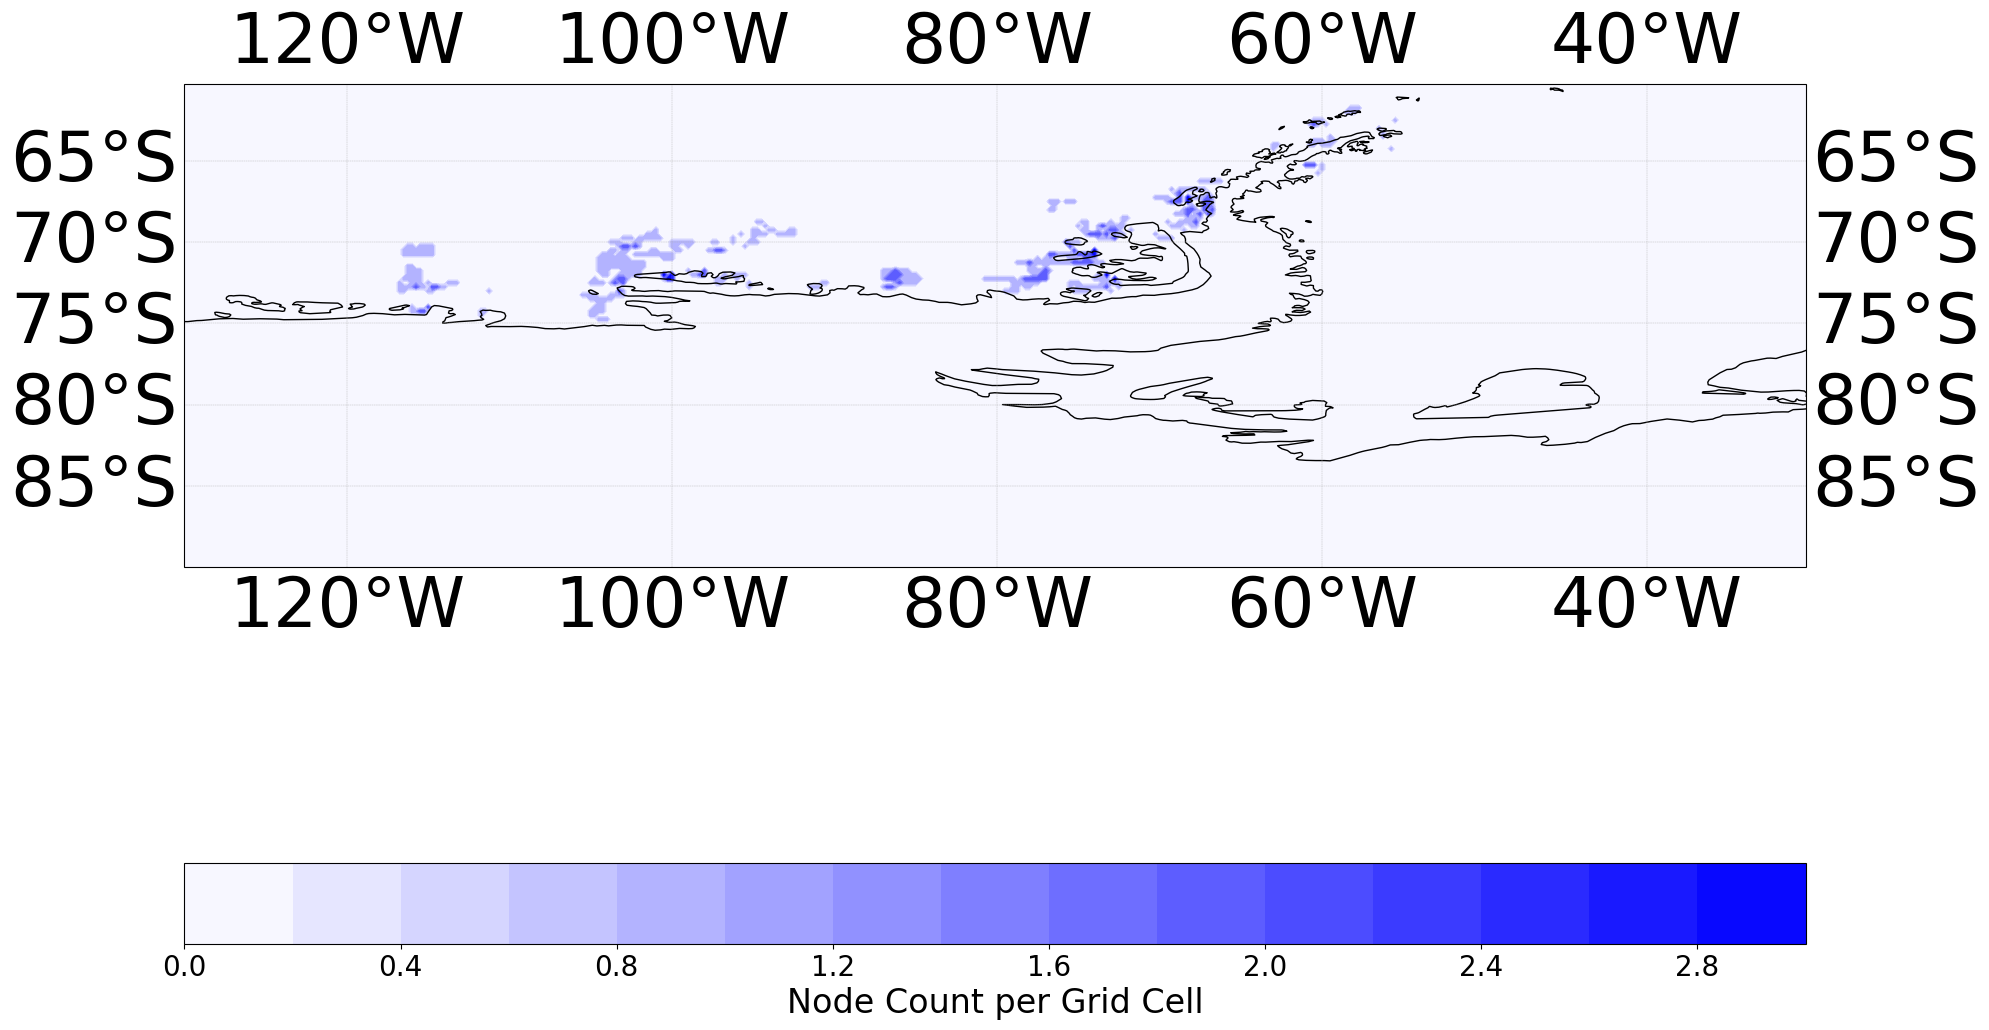

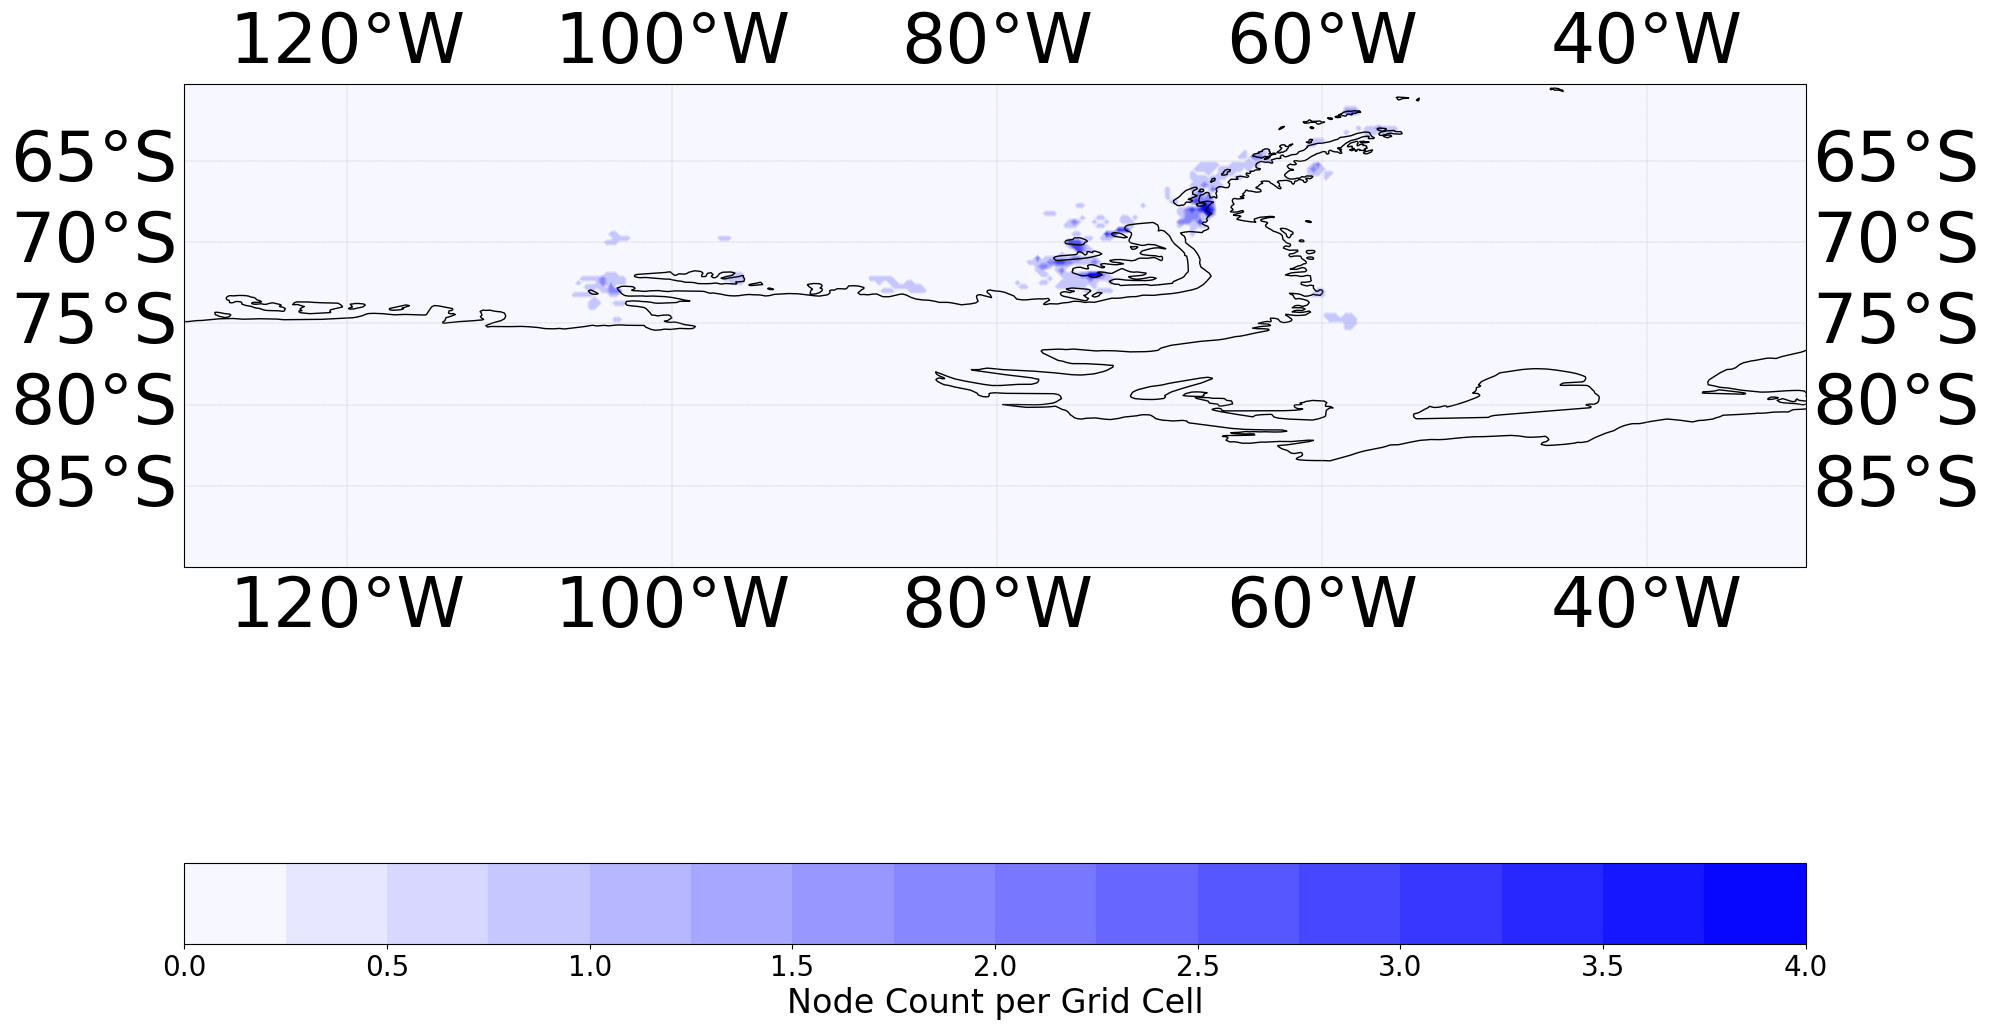

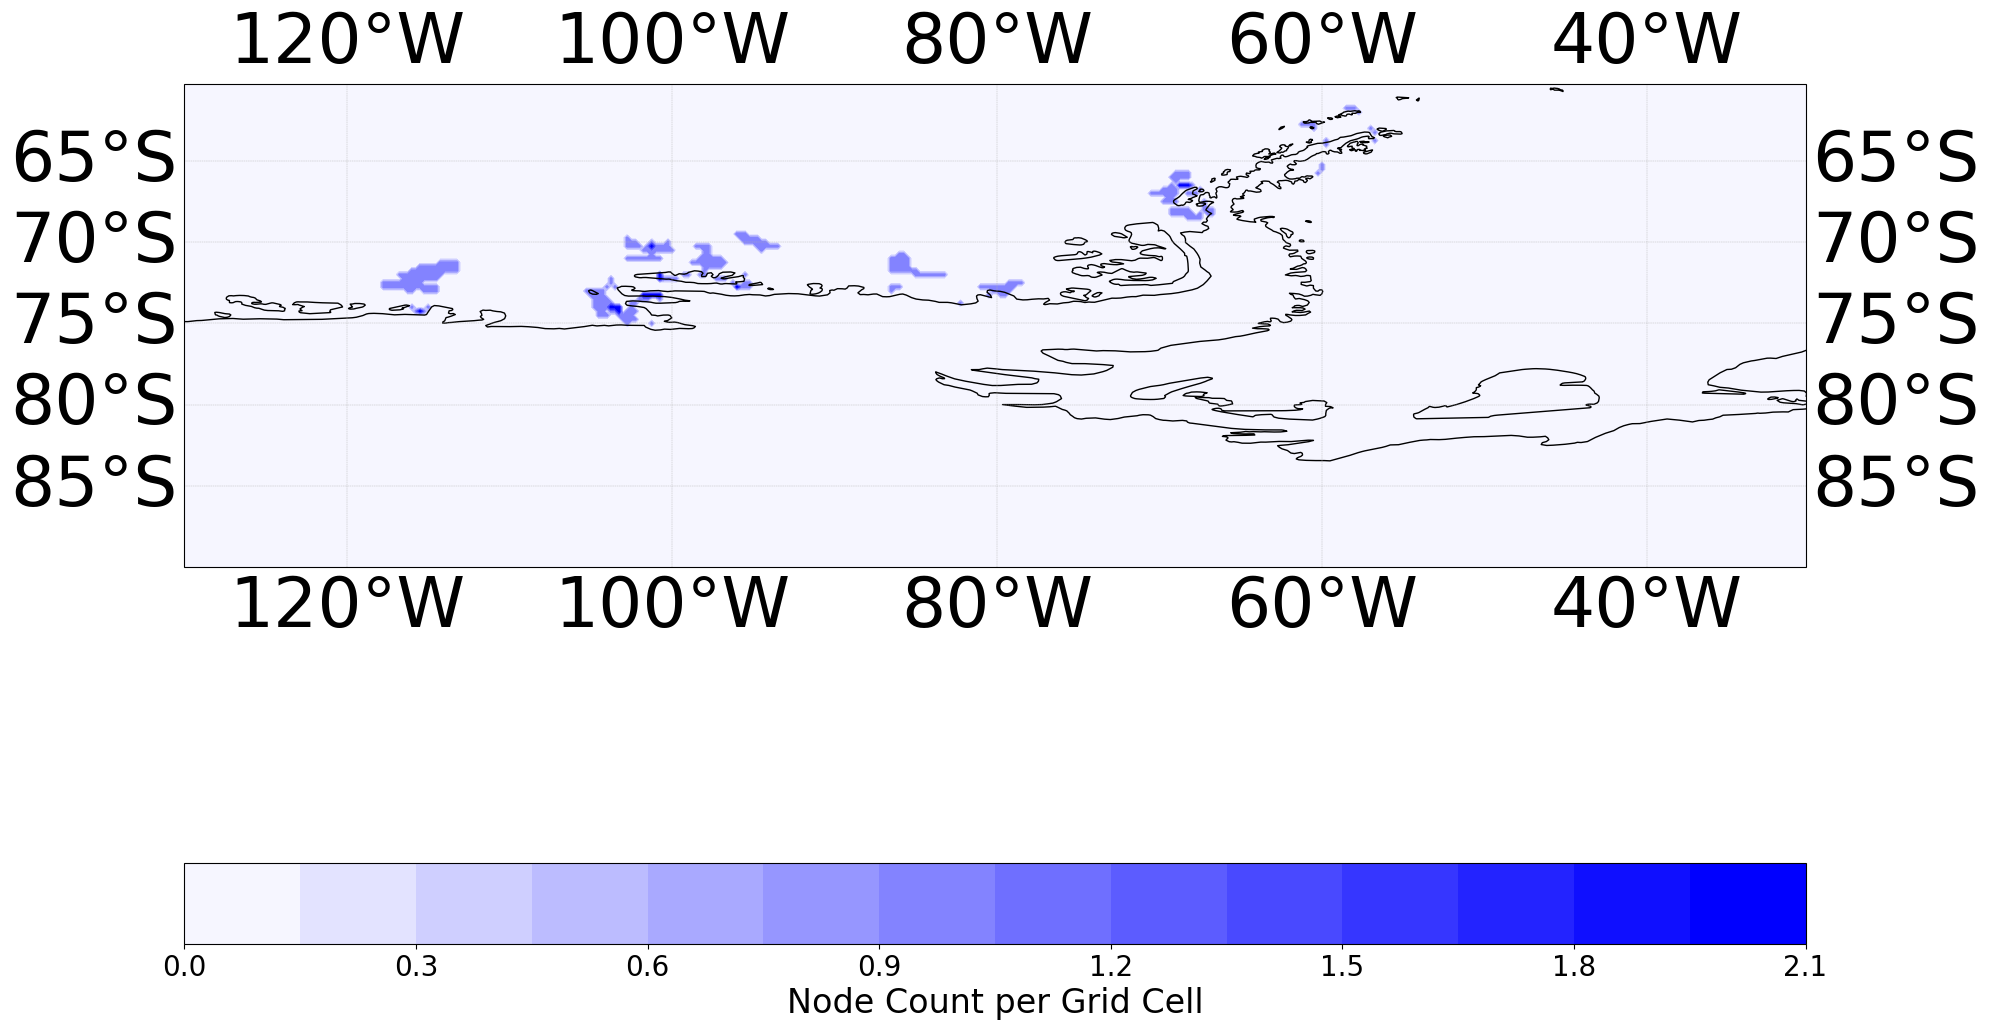

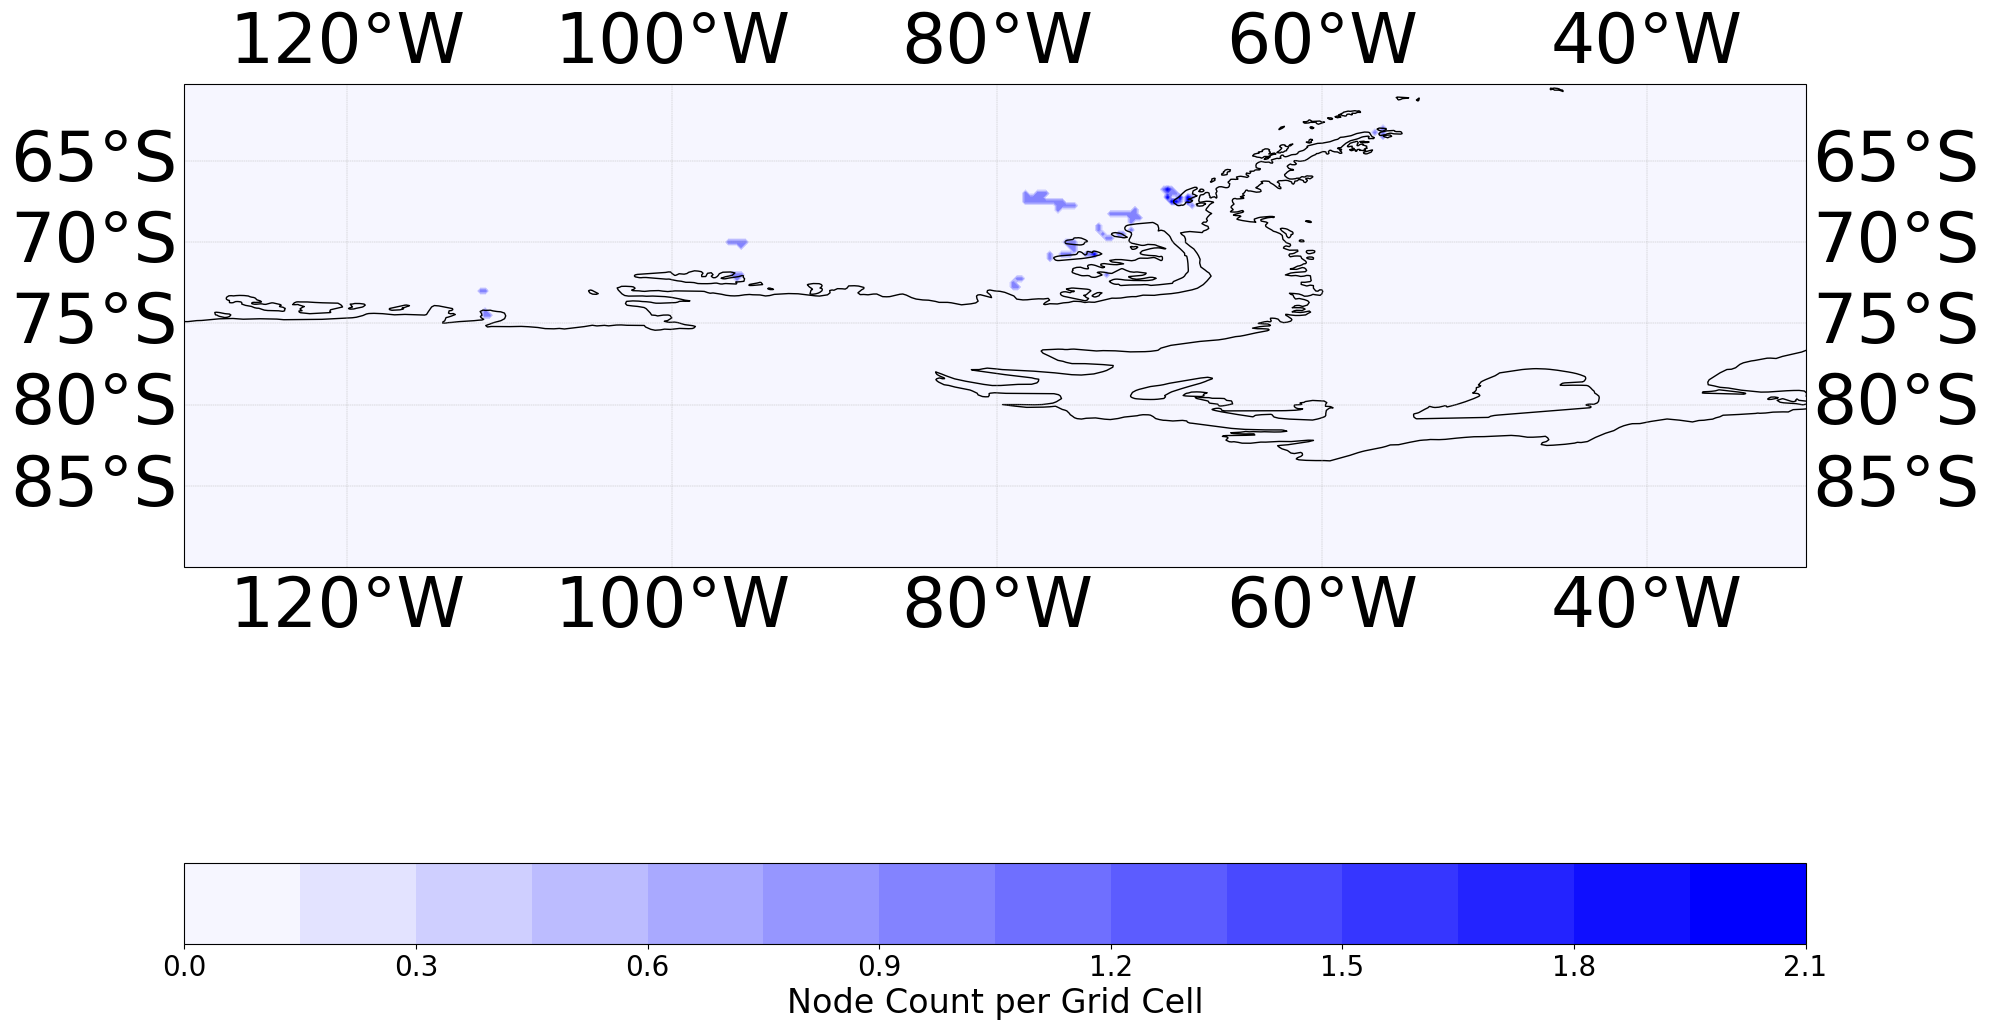

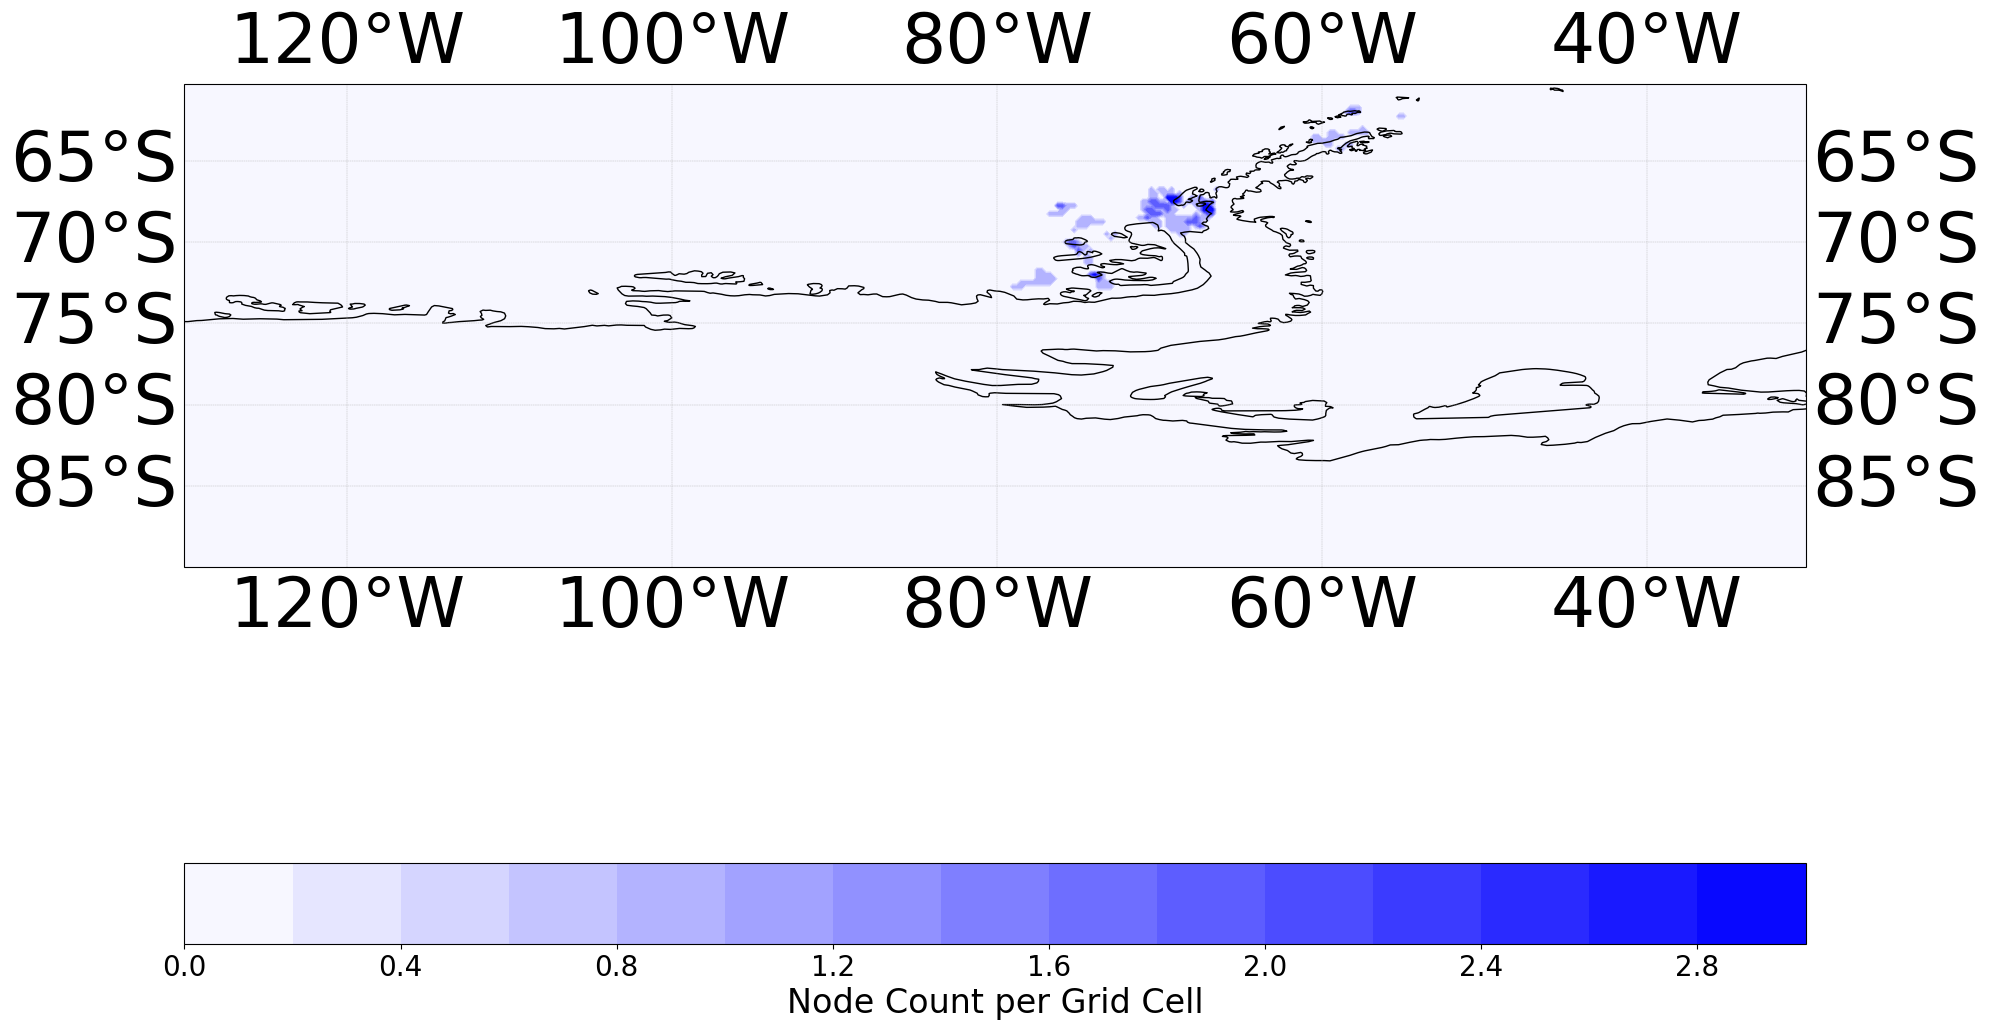

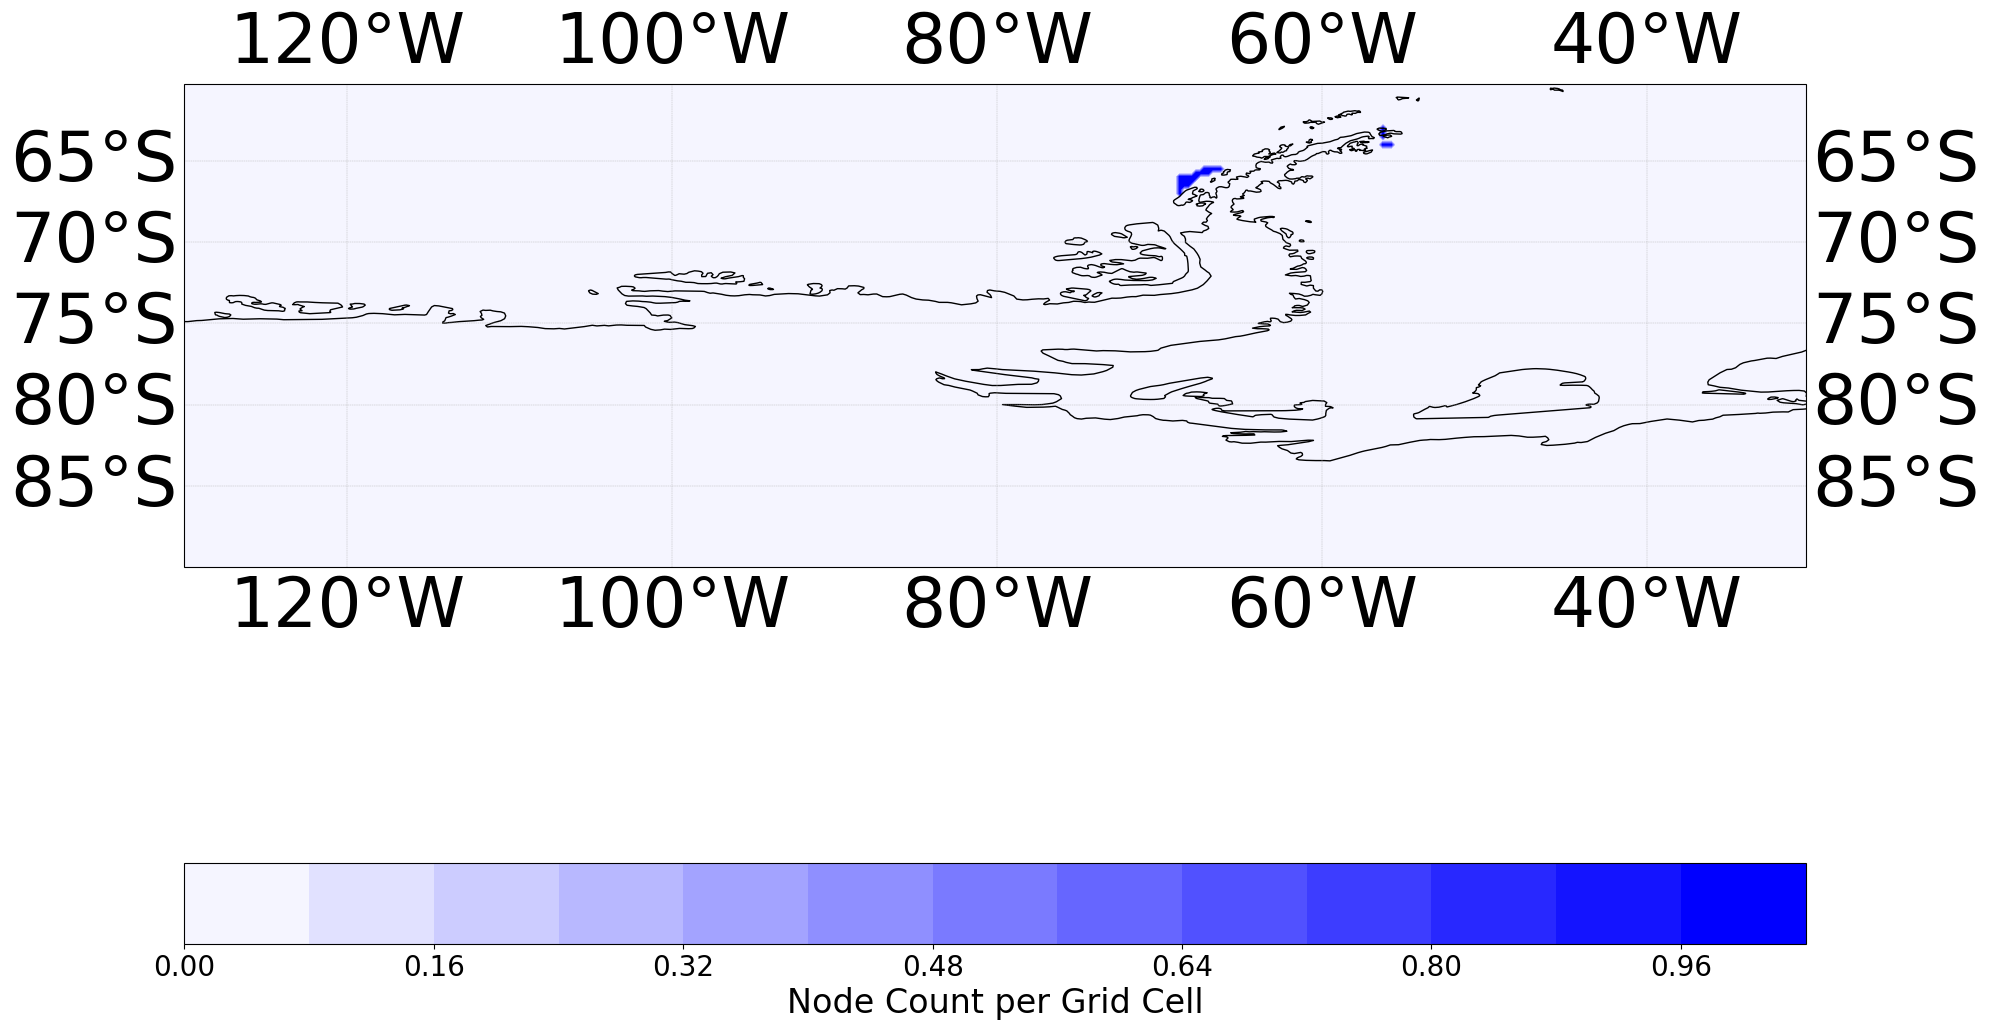

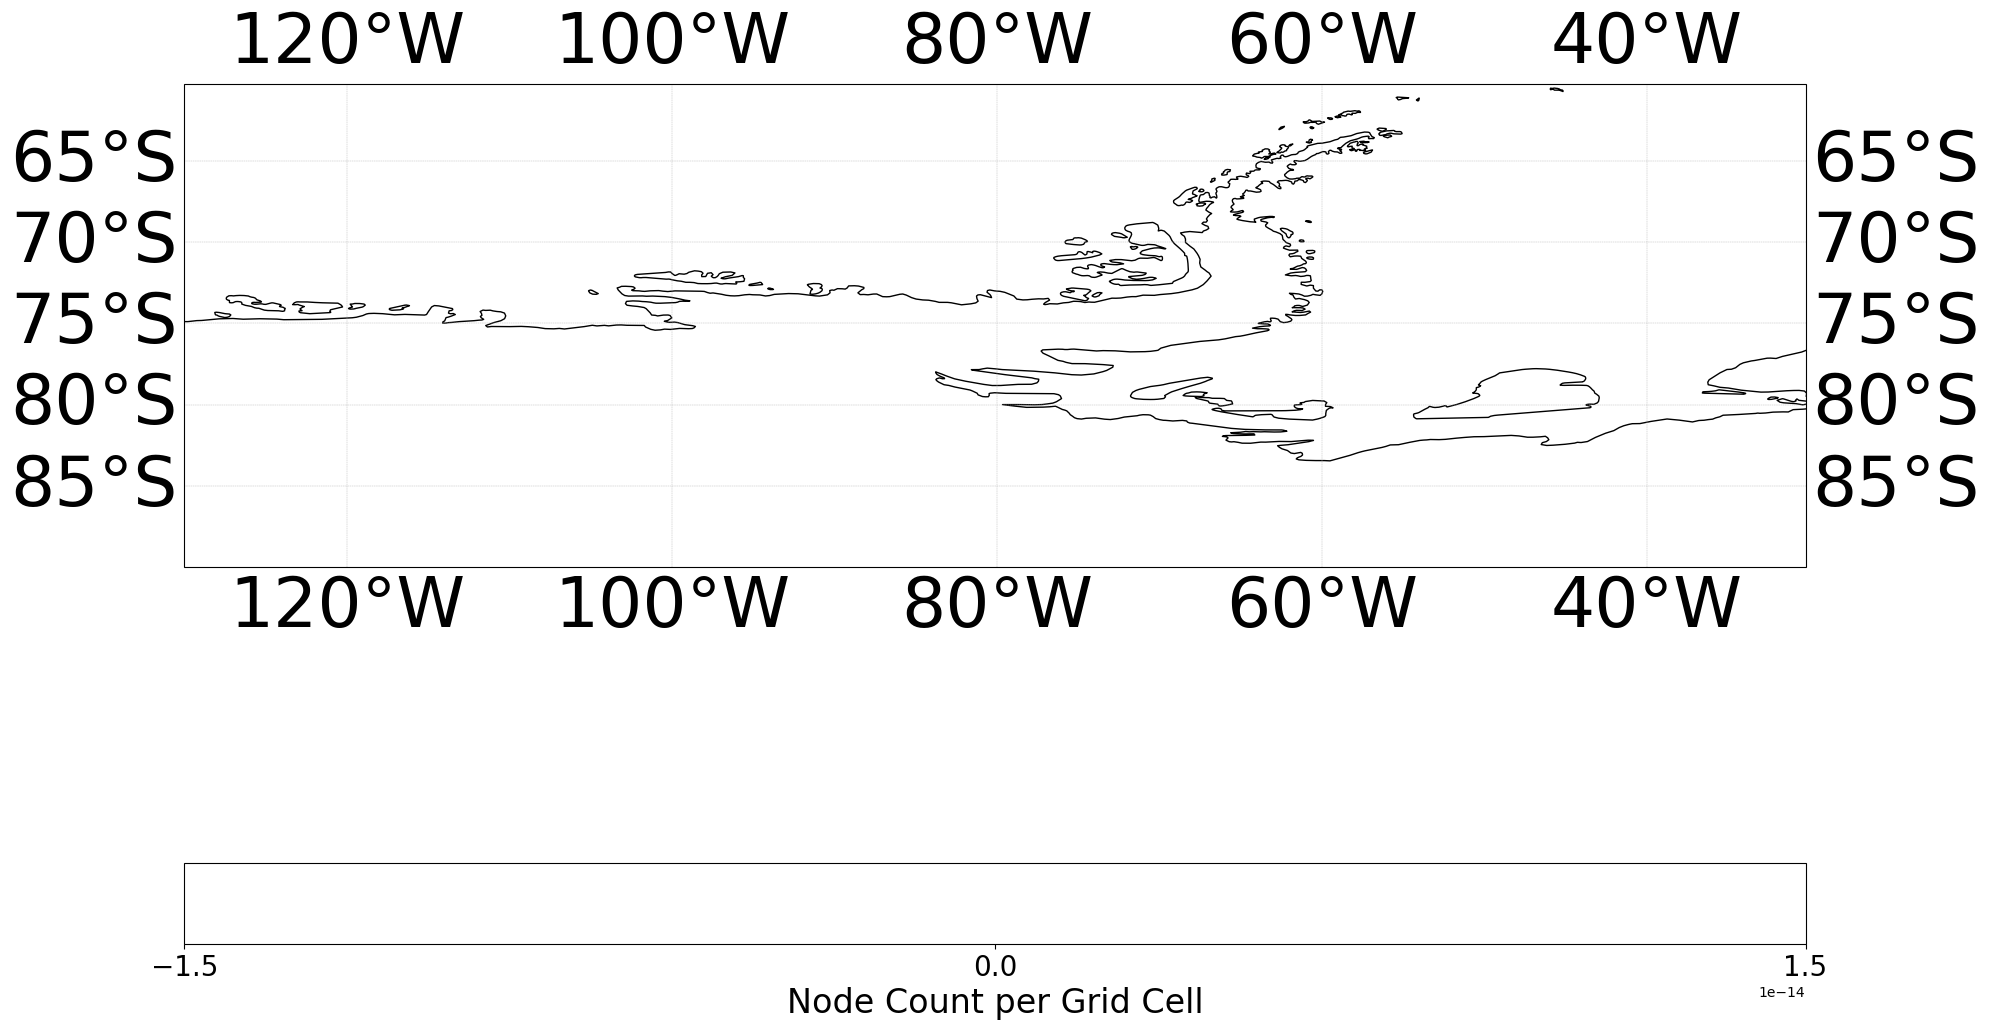

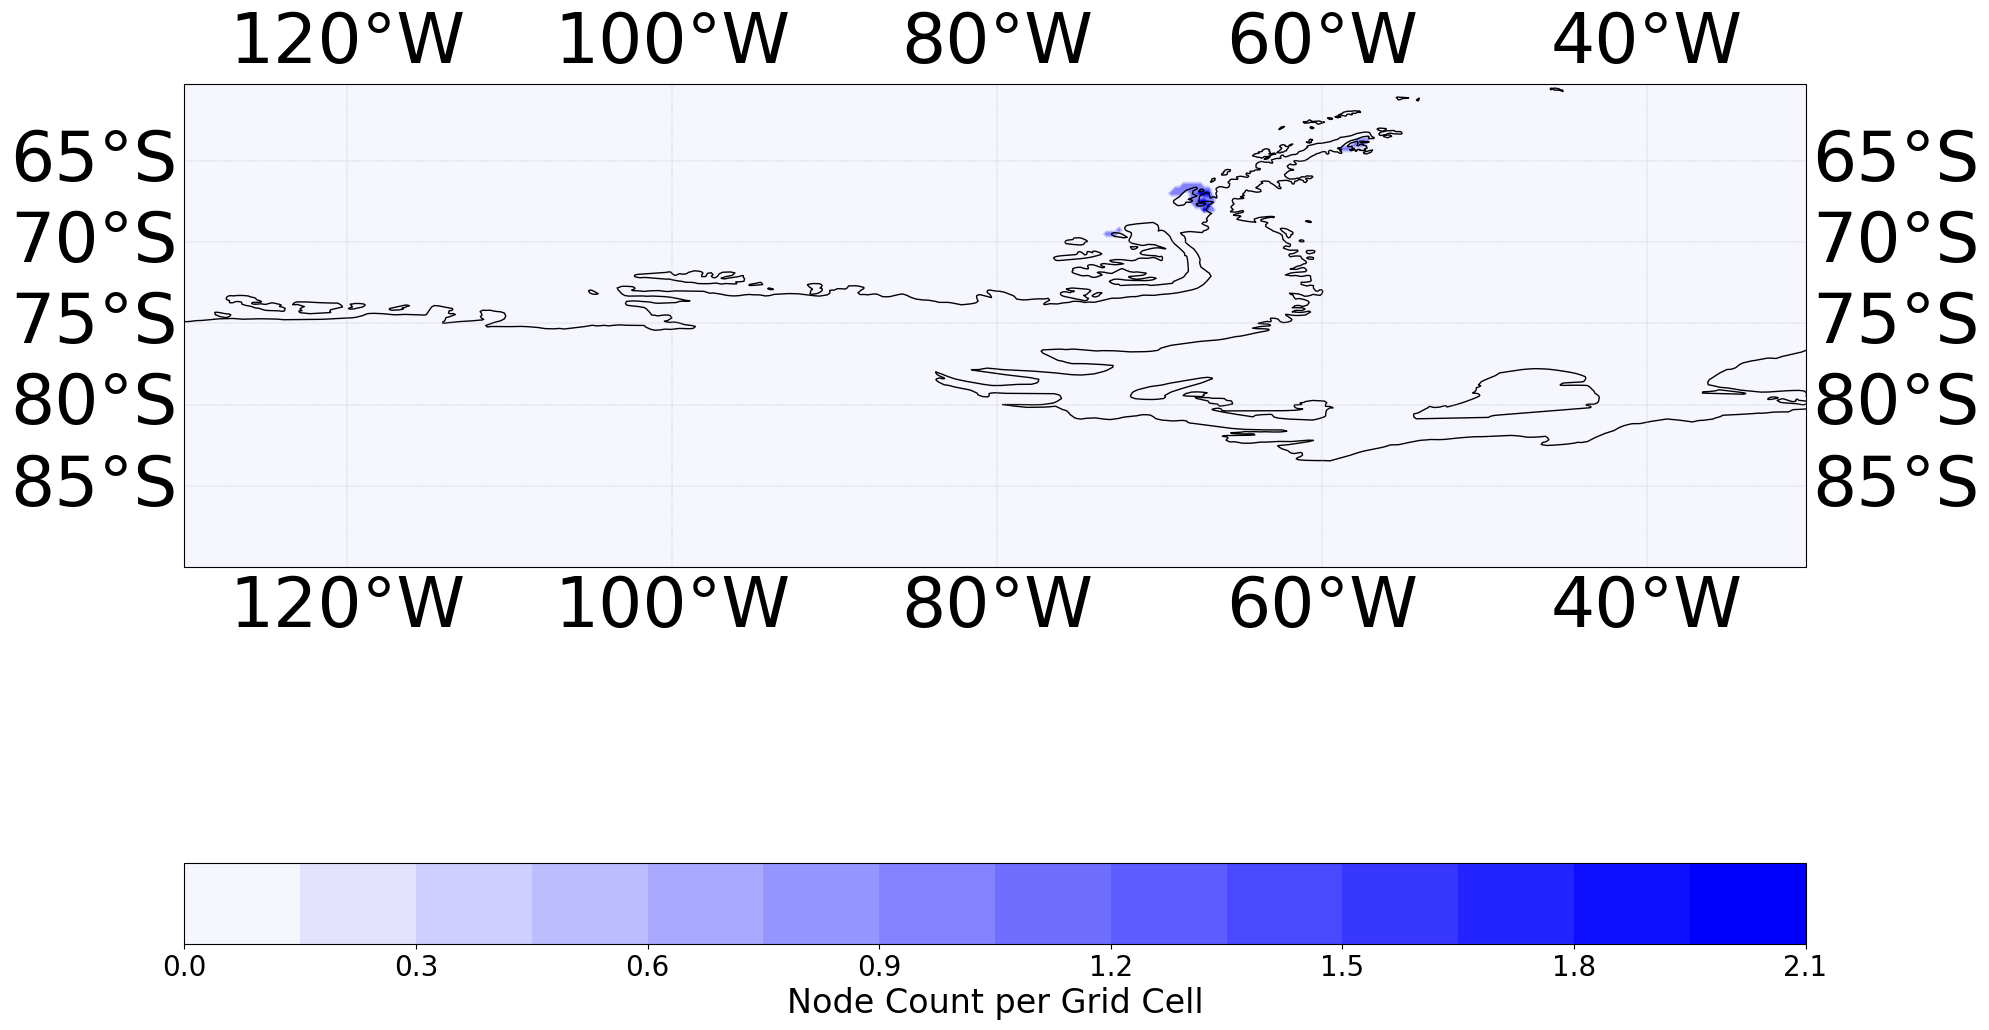

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import os


def add_colorbar_for_node_edge_intensity(fig, ax, max_node_count, max_edge_count):
    # Sea Ice Node (Green) intensity
    sm_sea_ice = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=1, vmax=max_node_count))
    sm_sea_ice._A = []
    cbar_sea = fig.colorbar(sm_sea_ice, ax=ax, orientation='horizontal', pad=0.01, shrink=0.5)
    cbar_sea.set_label("Sea Ice Node Intensity", fontsize=24)

    # Ice Sheet Node (Red) intensity
    sm_ice_sheet = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=1, vmax=max_node_count))
    sm_ice_sheet._A = []
    cbar_land = fig.colorbar(sm_ice_sheet, ax=ax, orientation='horizontal', pad=0.06, shrink=0.5)
    cbar_land.set_label("Ice Sheet Node Intensity", fontsize=24)

    # Path repetition intensity
    sm_edge = plt.cm.ScalarMappable(cmap=cm.plasma, norm=plt.Normalize(vmin=1, vmax=max_edge_count))
    sm_edge._A = []
    cbar_edge = fig.colorbar(sm_edge, ax=ax, orientation='horizontal', pad=0.11, shrink=0.5)
    cbar_edge.set_label("Path Repetition Count", fontsize=24)

# We'll re-insert this into the final plotting function next.

# Re-import required modules after reset
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import cm, colors
import cmocean

from matplotlib.colors import LinearSegmentedColormap

white_to_blue = LinearSegmentedColormap.from_list("white_to_blue", ["white", "blue"])


def plot_node_edge_repetition_on_antarctica_colored(
    latpm,
    lonpm,

    node_info_dict,
    edge_info_dict,
    y_offset=0,
    padding_cells=1,
    title="Antarctic Node/Path Repetition (Colored)",
    output_dir=None
):
    lons, lats = [], []
    for node, info in node_info_dict.items():
        col, row = info['pos']
        lons.append(-130 + col * 0.25)
        lats.append(-60 - row * 0.25)

    min_lon1 = np.floor(min(lons) / 0.25) * 0.25
    max_lon1 = np.ceil(max(lons) / 0.25) * 0.25
    min_lat1 = np.floor(min(lats) / 0.25) * 0.25
    max_lat1 = np.ceil(max(lats) / 0.25) * 0.25

    min_lon_idx = int((min_lon1 - (-130)) / 0.25) - padding_cells
    max_lon_idx = int((max_lon1 - (-130)) / 0.25) + padding_cells
    min_lat_idx = int((-60 - max_lat1) / 0.25) - padding_cells
    max_lat_idx = int((-60 - min_lat1) / 0.25) + padding_cells

    lat = latpm[min_lat_idx:max_lat_idx]
    lon = lonpm[min_lon_idx:max_lon_idx]

    
    
    trend11 = trend1[min_lat_idx:max_lat_idx, min_lon_idx:max_lon_idx]

    projection = ccrs.PlateCarree(central_longitude=0.0)
    fig, ax = plt.subplots(figsize=(30, 30), subplot_kw={'projection': projection})

    contour = ax.contourf(lon, lat, np.clip(trend11, 0, 1), vmin=0, vmax=1,
                          transform=projection, levels=90, cmap='Blues')

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.gridlines(draw_labels=True, linewidth=0.3, linestyle='--')

  


    max_node_count = max(info['count'] for info in node_info_dict.values())
    max_edge_count = max(info['count'] for info in edge_info_dict.values())

    # Plot nodes with color intensity based on type and count
    for node, info in node_info_dict.items():
        col, row = info['pos']
        node_lon = -130 + col * 0.25 + 0.125
        node_lat = -60 - row * 0.25 - 0.125 + y_offset
        size = 10 + 20 * np.log1p(info['count'])

        if node.startswith('O'):
            cmap = plt.cm.Greens
        else:
            cmap = plt.cm.Reds
        color = cmap(info['count'] / max_node_count)

        ax.plot(node_lon, node_lat, 'o', color=color, alpha=0.9, markersize=size,
                transform=projection, zorder=3)

        # if info['count'] >= 4:
        #     ax.text(node_lon + 0.1, node_lat + 0.1, f"{info['count']}", fontsize=10,
        #             transform=projection, color='black', zorder=4)

    # Plot edges with color intensity
    for (u, v), info in edge_info_dict.items():
        col1, row1 = info['pos_u']
        col2, row2 = info['pos_v']
        lon1 = -130 + col1 * 0.25 + 0.125
        lat1 = -60 - row1 * 0.25 - 0.125 + y_offset
        lon2 = -130 + col2 * 0.25 + 0.125
        lat2 = -60 - row2 * 0.25 - 0.125 + y_offset
        weight = info['count'] / max_edge_count
        color = cm.plasma(weight)

        ax.annotate("",
                    xy=(lon2, lat2), xytext=(lon1, lat1),
                    arrowprops=dict(arrowstyle='->', color=color, lw=1.5 + 3 * weight),
                    transform=projection, zorder=2)

    ax.set_title(title, fontsize=40)

    # Colorbars for Sea Ice, Ice Sheets, and Paths
    #add_colorbar_for_node_edge_intensity(fig, ax, max_node_count, max_edge_count)

    plt.tight_layout()

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(60)
        tick.label1.set_fontweight('bold')
        tick.label1.set_color('black')

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(60)
        tick.label1.set_fontweight('bold')
        tick.label1.set_color('black')


    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        out_path = os.path.join(output_dir, "antarctic_node_edge_repetition_map_colored.png")
        plt.savefig(out_path, dpi=300)
        print(f"Saved to {out_path}")

    plt.show()


def plot_node_count_on_antarctica(
    latpm,
    lonpm,
 
    node_info_dict,
    y_offset=0,
    padding_cells=1,
    title="Antarctic Node Count Per Grid",
    output_dir=None
):
    # Collect all node positions
    lons, lats = [], []
    for node, info in node_info_dict.items():
        col, row = info['pos']
        lon = -130 + col * 0.25
        lat = -60 - row * 0.25
        lons.append(lon)
        lats.append(lat)

    # Bounding box (snapped)
    # min_lat1 = np.floor(min(lons) / 0.25) * 0.25
    # max_lat1 = np.ceil(max(lons) / 0.25) * 0.25
    # min_lon1 = np.floor(min(lats) / 0.25) * 0.25
    # max_lon1 = np.ceil(max(lats) / 0.25) * 0.25

    # Indices
    min_lon_idx = 0#int((min_lon1 - (-130)) / 0.25) - padding_cells
    max_lon_idx = 400#int((max_lon1 - (-130)) / 0.25) + padding_cells
    min_lat_idx = 0#int((-60 - max_lat1) / 0.25) - padding_cells
    max_lat_idx = 120#int((-60 - min_lat1) / 0.25) + padding_cells

    # Extract data
    lat = latpm[min_lat_idx:max_lat_idx]
    lon = lonpm[min_lon_idx:max_lon_idx]

    # Initialize node count matrix
    node_grid = np.zeros_like(trend1, dtype=int)

    print(node_grid.shape)

    for node, info in node_info_dict.items():
        col, row = info['pos']

       
        node_grid[row, col] = node_info_dict[node]['count']
    

    #print(min_lat_idx, max_lat_idx, min_lon_idx, max_lon_idx)

    node_count_subregion = node_grid[min_lat_idx:max_lat_idx, min_lon_idx:max_lon_idx]

    mean_val = np.mean(node_count_subregion)
    std_val = np.std(node_count_subregion)

    vmin = 0 #mean_val - std_val
    vmax = np.max(node_count_subregion)  #mean_val + std_val  


  

    # Setup Cartopy
    projection = ccrs.PlateCarree(central_longitude=0.0)
    fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': projection})

    contour = ax.contourf(
    lon,
    lat,
    node_count_subregion,
    transform=projection,
    levels=15,
    cmap=white_to_blue,  # replace 'zeds' with a valid option
    vmin=vmin,vmax = vmax
)

    # contour = ax.contourf(lon, lat, np.clip(node_count_subregion,0,1),
    #                       transform=projection, 
    #                       levels=15, cmap=white_to_blue,vmin=0)

    

    # contour = ax.contourf(
    #     lon,
    #     lat,
    #     np.clip(node_count_subregion, 0, 0.5),
    #     transform=projection,
    #     levels=15,
    #     cmap=cmocean.cm.algae,  # Use 'zeds' from cmocean
    #     vmin=0
    # )

    cbar = fig.colorbar(contour, ax=ax, orientation='horizontal') #, pad=0.05, shrink=0.6)
    cbar.set_label("Node Count per Grid Cell", fontsize=24)
    cbar.ax.tick_params(labelsize=20)


    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    gl = ax.gridlines(draw_labels=True, linewidth=0.3, linestyle='--')
    gl.xlabel_style = {'size': 50, 'color': 'black'}
    gl.ylabel_style = {'size': 50, 'color': 'black'}



    
    #ax.set_title(title, fontsize=30)
    plt.tight_layout()

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(160)
        tick.label1.set_fontweight('bold')
        tick.label1.set_color('black')

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(160)
        tick.label1.set_fontweight('bold')
        tick.label1.set_color('black')

    #plt.savefig(folder_path+'.pdf', dpi=300, bbox_inches='tight')

    plt.savefig(folder_path+'.png', dpi=150, bbox_inches='tight')


def plot_node_edge_repetition_with_lon_filter(
    latpm,
    lonpm,

    node_info_dict,
    edge_info_dict,
    lon_ranges,
    y_offset=0,
    padding_cells=1,
    title_prefix="Antarctic View",
    output_dir=None
):
    for i, (lon_min_view, lon_max_view) in enumerate(lon_ranges, 1):
        filtered_nodes = {
            node: info for node, info in node_info_dict.items()
            if lon_min_view <= (-130 + info['pos'][0] * 0.25) <= lon_max_view
        }

        filtered_edges = {
            (u, v): info for (u, v), info in edge_info_dict.items()
            if u in filtered_nodes and v in filtered_nodes
        }

        # if not filtered_nodes:
        #     print(f"No nodes found in range {lon_min_view} to {lon_max_view}. Skipping.")
        #     continue

        plot_node_count_on_antarctica(
            latpm=latpm,
            lonpm=lonpm,
  
            node_info_dict=filtered_nodes,
           
            y_offset=y_offset,
            padding_cells=padding_cells,
            title=f"{title_prefix} [{lon_min_view}° to {lon_max_view}°]",
            output_dir=os.path.join(output_dir, f"view_{i}") if output_dir else None
        )

# Define the four longitude ranges
lon_intervals = [
    (-130.0, -30)
 
]




        

# lon_intervals = [(-130, -30)]


folder_paths = [f"r{i}-r{j}" for i in range(1, 4) for j in range(1, 4)]

for folder_path in folder_paths:


    print(folder_path)
    

    node_info_dict, edge_info_dict = extract_node_edge_info_from_pickles(folder_path)


    plot_node_edge_repetition_with_lon_filter(
        latpm=lat,
        lonpm=lon,
        node_info_dict=node_info_dict,
        edge_info_dict=edge_info_dict,
        lon_ranges=lon_intervals,
        y_offset=0,
        title_prefix="Antarctic Node/Path View",
        output_dir=""
    )




